In [1]:
import yaml
from api.source.operators.controller import Controller

In [4]:
with open("api\configs\pipeline.yml", "r") as file:
    config = yaml.safe_load(file)

In [5]:
controller_instance = Controller(config)

In [6]:
controller_instance.process_video()

In [16]:
controller_instance.switch_model("faster_rcnn")

In [15]:
controller_instance.switch_camera("traffic_vn")

In [4]:
from ultralytics import YOLO

In [7]:
model = YOLO("api/data/models/one-stage/yolo11-noaugment.pt")

In [11]:
results = model.track(source="api/data/samples/videos/Traffic_VN_scaled.mp4", show=True, conf=0.5, stream=True)

In [8]:
import torch
from ultralytics import YOLO, RTDETR
from torchvision import transforms

from api.source.engines.detectors.FasterRCNN import FRCNN

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [10]:
frcnn_model = FRCNN(num_classes=5)
checkpoint = torch.load(
    "api/data/models/two-stage/frcnn_best.pt",
    map_location=device,
    weights_only=True)
frcnn_model.load_state_dict(checkpoint["model_state_dict"])
frcnn_model.to(device)
frcnn_model.eval()
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(640, 640)),
])

In [11]:
yolo_model = YOLO("api/data/models/one-stage/yolo11-noaugment.pt")
rtdetrv2_model = RTDETR("api/data/models/transformer-based/rtdetrv2-nano-resnet.pt")

In [15]:
total_params_yolo = sum(p.numel() for p in yolo_model.model.parameters())
trainable_params_yolo = sum(p.numel() for p in yolo_model.model.parameters() if p.requires_grad)

total_params_rtdetr = sum(p.numel() for p in rtdetrv2_model.model.parameters())
trainable_params_rtdetr = sum(p.numel() for p in rtdetrv2_model.model.parameters() if p.requires_grad)

total_params_frcnn = sum(p.numel() for p in frcnn_model.parameters())
trainable_params_frcnn = sum(p.numel() for p in frcnn_model.parameters() if p.requires_grad)

print(f"YOLO model parameters: {total_params_yolo:,} total, {trainable_params_yolo:,} trainable")
print(f"RTDETR model parameters: {total_params_rtdetr:,} total, {trainable_params_rtdetr:,} trainable")
print(f"Faster R-CNN model parameters: {total_params_frcnn:,} total, {trainable_params_frcnn:,} trainable")

YOLO model parameters: 2,590,620 total, 0 trainable
RTDETR model parameters: 2,830,408 total, 0 trainable
Faster R-CNN model parameters: 5,404,872 total, 5,404,872 trainable


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cap = cv2.VideoCapture("api/data/samples/videos/Traffic_VN.mp4")

In [3]:
ret, frame = cap.read()

In [4]:
frame1 = frame.copy()
frame2 = frame.copy()
frame3 = frame.copy()

In [25]:
cap.release()

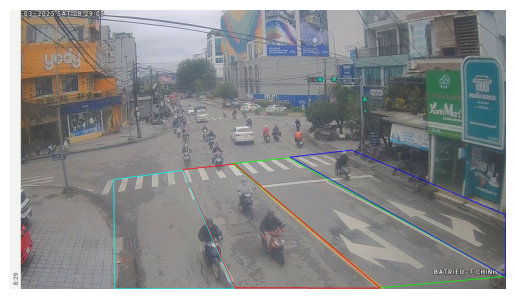

In [7]:
lane_1 = [[864, 594], [1079, 572], [1919, 1031], [1433, 1075]]
lane_2 = [[1084, 569], [1322, 542], [1919, 793], [1919, 1031]]
lane_3 = [[669, 617], [870, 596], [1433, 1076], [869, 1075]]
lane_4 = [[401, 656], [669, 620], [867, 1079], [405, 1079]]

cv2.polylines(frame1, [np.array(lane_1)], isClosed=True, color=(0, 255, 0), thickness=2)
cv2.polylines(frame1, [np.array(lane_2)], isClosed=True, color=(255, 0, 0), thickness=2)
cv2.polylines(frame1, [np.array(lane_3)], isClosed=True, color=(0, 0, 255), thickness=2)
cv2.polylines(frame1, [np.array(lane_4)], isClosed=True, color=(255, 255, 0), thickness=2)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

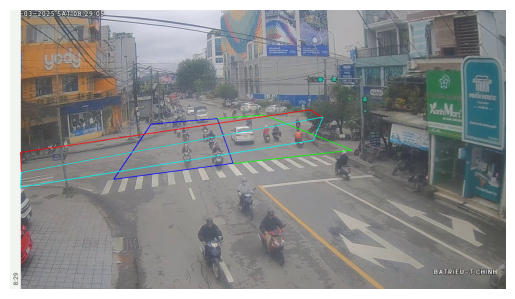

In [8]:
lane_1 = [[801, 420], [984, 406], [1324, 542], [864, 594]]
lane_2 = [[546, 441], [802, 420], [863, 593], [401, 655]]
lane_3 = [[40, 551], [1160, 386], [1208, 414], [43, 627]]
lane_4 = [[43, 628], [1211, 414], [1174, 504], [39, 686]]

cv2.polylines(frame2, [np.array(lane_1)], isClosed=True, color=(0, 255, 0), thickness=2)
cv2.polylines(frame2, [np.array(lane_2)], isClosed=True, color=(255, 0, 0), thickness=2)
cv2.polylines(frame2, [np.array(lane_3)], isClosed=True, color=(0, 0, 255), thickness=2)
cv2.polylines(frame2, [np.array(lane_4)], isClosed=True, color=(255, 255, 0), thickness=2)
plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [11]:
import numpy as np

# Example list of past positions (x, y)
trajectory = [
    (100, 200),
    (102, 202),
    (105, 205),
    (110, 210)
]

# Convert to NumPy array for easier calculations
points = np.array(trajectory, dtype=np.float32)

# Compute the direction vector from the last two points
direction_vector = points[-1] - points[-2]

# Normalize the direction vector
norm = np.linalg.norm(direction_vector)
if norm != 0:
    unit_vector = direction_vector / norm
else:
    unit_vector = direction_vector  # Handle zero-length vector

print(f"Direction vector: {direction_vector}")
print(f"Unit direction vector: {unit_vector}")


Direction vector: [          5           5]
Unit direction vector: [    0.70711     0.70711]
